卷积神经网络之池化层-Pooling
===

# 1.池化层的定义
我们知道卷积可以提取图片的特征，之所以使用卷积后的特征，是因为图像具有“静态型”的属性，也就意味着在一个图像区域的特征极有可能在另一个区域同样适用。所以，当我们描述一个大的图像的时候就可以对不同位置的特征进行聚合统计这种统计方式不仅可以降低纬度，还不容易过拟合。这种聚合统计的操作就称之为池化。

对于上述所说的聚合统计，一般来说就是计算平均值或者最大值，也就对应了两种池化方法即平均池化和最大池化

# 2.池化层的作用

## 2.1.保留特征的同时减少参数和计算量，防止过拟合
池化层在保证图片特征的情况下，将图片压缩变小，可以简化网络计算复杂度，提取主要特征。
![images](Images/05_03_001.png)

## 2.2.池化层具有不变性(invariance)
这里的不变性包括平移，旋转，尺度

### 2.2.1.平移不变性
![images](Images/05_03_002.jpg)

假设有一个16x16的图片，里面有个数字1，我们需要识别出来，这个数字1可能写的偏左一点，这个数字1可能偏右一点，图1到图2相当于向右平移了一个单位，但是图1和图2经过max pooling之后它们都变成了相同的8x8特征矩阵，主要的特征我们捕获到了，同时又将问题的规模从16x16降到了8x8，而且具有平移不变性的特点。图中的a（或b）表示，在原始图片中的这些a（或b）位置，最终都会映射到相同的位置。

### 2.2.2.旋转不变性
![images](Images/05_03_003.jpg)

汉字“一”的识别，第一张相对于x轴有倾斜角，第二张是平行于x轴，两张图片相当于做了旋转，经过多次max pooling后具有相同的特征

### 2.2.3.尺度不变性
![images](Images/05_03_004.jpg)

上图表示数字“0”的识别，第一张的“0”比较大，第二张的“0”进行了较小，相当于作了缩放，同样地，经过多次max pooling后具有相同的特征

# 3.池化层的算法
![images](Images/05_03_005.png)

# 4.最大池化层之前向算法

In [ ]:
import numpy as np
x = None # picture
stride = 2
ksize = 2
output_channels = 64
out = np.zeros([x.shape[0], int(x.shape[1] / stride), int(x.shape[2] / stride), output_channels])

for b in range(x.shape[0]):
    for c in range(output_channels):
        for i in range(0, x.shape[1], stride):
            for j in range(0, x.shape[2], stride):
                out[b, int(i / stride), int(j / stride), c] = np.max(
                    x[b, i:i + ksize, j:j + ksize, c])
                index = np.argmax(x[b, i:i + ksize, j:j + ksize, c])
                index[b, i + int(index / stride), j + index % stride, c] = 1

我们可以很明显的看到，就是从图片上按照ksize，stride来找到每一个区块，然后找到这个区块内各个值得最大值，然后放入结果中的相应位置上，index是用来后期做反向传播用的

# 5.实例展示

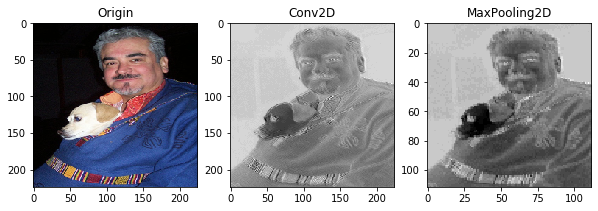

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

import torchvision.models as models
import torch
import JLib.pyn.cnn.python_layer as epcl
import JLib.pyn.cnn.functions as epcf

plt.figure(figsize=(10,10), facecolor='w')
imagePath = "data/ConvVisible01.jpg"
img = cv2.imread(imagePath)
basicImage = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
originImg = cv2.resize(basicImage, (224,224))
plt.subplot(1,3,1)
plt.title('Origin')
plt.imshow(originImg)

conv1 = epcl.Conv2D(3, 64, 3, 1, 'SAME')
img = epcf.preprocess_image(basicImage).transpose((0, 2, 3, 1))
conv1_img = conv1(img)
feature = conv1_img[:, :, :,0]
feature = np.reshape(feature, newshape=(feature.shape[1], feature.shape[2]))
feature = 1.0 / (1 + np.exp(-1 * feature))
feature = np.round(feature * 255)
plt.subplot(1,3,2)
plt.title('Conv2D')
plt.imshow(feature, cmap='gray')

pool1 = epcl.MaxPooling2D(ksize=2, stride=2)
pool_img = pool1(conv1_img)
feature = pool_img[:, :, :,0]
feature = np.reshape(feature, newshape=(feature.shape[1], feature.shape[2]))
feature = 1.0 / (1 + np.exp(-1 * feature))
feature = np.round(feature * 255)
plt.subplot(1,3,3)
plt.title('MaxPooling2D')
plt.imshow(feature, cmap='gray')

# 5.最大池化层之梯度计算

# 6.最大池化层之反向算法

# 7.平均池化层之前向算法

In [ ]:
import numpy as np
x = None # picture
stride = 2
ksize = 2
output_channels = 64
out = np.zeros([x.shape[0], int(x.shape[1] / stride), int(x.shape[2] / stride), output_channels])

for b in range(x.shape[0]):
    for c in range(output_channels):
        for i in range(0, x.shape[1], stride):
            for j in range(0, x.shape[2], stride):
                out[b, int(i / stride), int(j / stride), c] = np.mean(
                    x[b, i:i + ksize, j:j + ksize, c])
                index = np.argmax(x[b, i:i + ksize, j:j + ksize, c])
                index[b, i + int(index / stride), j + index % stride, c] = 1

我们可以很明显的看到，跟最大池化的区别就是一个是求max，一个是求mean

# 8.平均池化层之梯度计算

# 9.平均池化层之反向算法

| 最大池化 | 平均池化 |
| ------- | ------- |
|![images](Images/05_03_006.png) | ![images](Images/05_03_007.png) |

# 10.全局平均池化Global Average Pool

In [2]:
import torch
import torch.nn.functional

a = torch.rand([4,3,4,4])
a.size()

torch.Size([4, 3, 4, 4])

In [3]:
b = torch.nn.functional.adaptive_avg_pool2d(a, [1,1])
b.size()

torch.Size([4, 3, 1, 1])